In [2]:
import math
import copy
import statistics
import numpy as np
import Parsing_midi as pm
import Init_chromo as init
import mido
import matplotlib.pyplot as plt
from mido import Message, MidiFile, MidiTrack
from collections import Counter

In [3]:
midi_list = pm.get_midi('MidiSample/sky.mid', 0)
note_msg, midi_msg = pm.separate_song(midi_list, 15360)
m = midi_msg[1]
n = midi_msg[2]

ori = pm.to_midi_file(m, 8 , 'ori.mid')

43

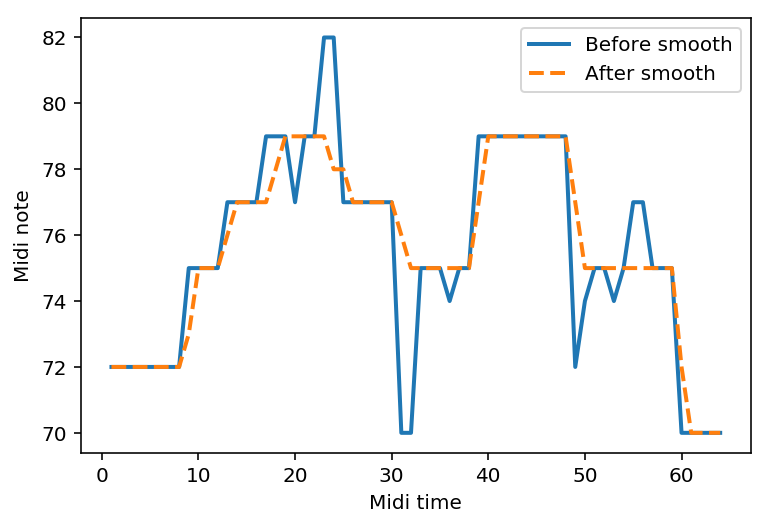

In [10]:
# 將note依照time拆成多個
def to_note_freq(midi_msg):     
    note_freq = []; count = 0
    for i in range(len(midi_msg)):
        if i % 2 == 0:
            for j in range(int((midi_msg[i].time + midi_msg[i+1].time)/240)):
                count += 1
                note_freq.append([midi_msg[i].note, count])
    return note_freq

# 計算面積差  
def count_area(ori_y, new_y):  
    area = 0
    for i in range(len(ori_y)):
        area += abs(ori_y[i]-new_y[i])
    return area

# smooth melody curve, sliding window = 7
def smooth(note_seq):  
    temp = []
    for i in range(len(note_seq)):
        if i < 4:
            temp.append(note_seq[i])
        elif i > len(note_seq) - 4:
            temp.append(note_seq[i])
        else:
            median = int(statistics.median(note_seq[i-4:i+4]))
            temp.append(median)
    return temp
   
a = to_note_freq(m)
b = to_note_freq(n)

# 拆成XY座標
x = [i[1] for i in a]
y = [i[0] for i in a]

x2 = [i[1] for i in b]
y2 = [i[0] for i in b]

# smooth
y_s1 = smooth(y)
y_s2 = smooth(y2)

# plot
plt.plot(x2, y2, linewidth=2.0, label='Before smooth')
plt.plot(x2, y_s2, linestyle='dashed', linewidth=2.0, label='After smooth')
plt.legend(loc='upper right')
plt.xlabel('Midi time')
plt.ylabel('Midi note')
plt.savefig('compare.jpg')

# count area
count_area(y2, y_s2)

In [5]:
## try 
manual = pm.get_midi('MidiSample/manual.mid', 0)
ori = pm.get_midi('MidiSample/ori.mid', 0)

In [6]:
# 校正頭尾
def correct_xy(xy1, xy2):
    if xy1[0][1] < xy2[0][1]:
        xy2[0][1] = xy1[0][1]
    else:
        xy1[0][1] = xy2[0][1]

    if xy1[-1][1] < xy2[-1][1]:
        xy2[-1][1] = xy1[-1][1]
    else:
        xy1[-1][1] = xy2[-1][1]
    return xy1, xy2